# FastMap algorithm

           0       1
0   3.875000  6.0625
1   3.000000  7.7500
2   0.000000  4.0000
3   1.041667  1.1875
4   2.458333  0.0000
5   9.500000  5.1875
6   2.458333  8.0000
7   1.500000  1.5625
8   2.458333  1.0000
9  12.000000  4.0000


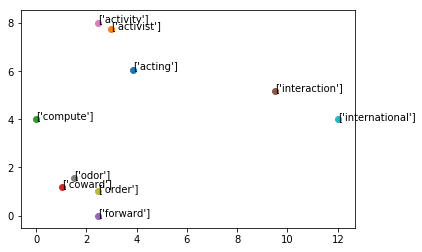

In [4]:
import math
import matplotlib.pyplot as plt
from random import *
from pandas import *

X=[]
dist=[]
col=0

def distance(a,b,col):
    if(col==1):
        return dist[a][b]   
    else:
        res=(math.pow(distance(a,b,col-1),2)-(math.pow(X[a][col-1]-X[b][col-1],2)))
        return (math.sqrt(res))

def chooseDistantObject(col):
    b=randint(1,10)
#   start with any random value
    count=18
    g_max=0
    g_a=0
    g_b=0
    
    while(count>0):
        max_dist=0
        for i in range(1,11):
            d=distance(b,i,col)
            if(d>max_dist):
                max_dist=d
                a=i
        
        if(max_dist>g_max):
            g_max=max_dist
            g_a=a
            g_b=b
        elif(max_dist==g_max):
            #compare ids
            g_min=min(g_a,g_b)
            c_min=min(a,b)
            if(c_min==min(g_min,c_min)):
                g_a=a
                g_b=b
       
        b=a
        count-=1;
    
    # Make point with lower id value as origin
    if(g_b<g_a):
        temp=g_a;
        g_a=g_b;
        g_b=temp;
    return g_a,g_b

#FastMap implementation
def FastMap(k):
    global col
    global X
    if(k<=0):
        return;
    else:
        col+=1

    a,b=chooseDistantObject(col)

    if(distance(a,b,col)==0):
        for i in range(1,11):
            X[i][col]=0
        return

    for i in range(1,11):
        #calculate projection on line a|<----------------------------------->|b
        if(i==a):
            dim_curr=0
        elif(i==b):
            dim_curr=distance(a,b,col)
        else:
            dim_curr=(math.pow(distance(a,i,col),2)+math.pow(distance(a,b,col),2)
                                 -math.pow(distance(b,i,col),2))/(2*distance(a,b,col))
        
        X[i][col]=dim_curr
         
    FastMap(k-1) #Call FastMap again with updated distances and k-1 dimensions


#Execution    
f = open('fastmap-data.txt')
line = f.readline()

##initialize 2-D arrays
dist=[[0 for i in range(11)] for j in range(11)]
X=[[0 for i in range(3)] for j in range(11)] #first col and row of x are just created to index properly
while line:
    arr=line.split()
    dist[int(arr[0])][int(arr[1])]=int(arr[2])
    dist[int(arr[1])][int(arr[0])]=int(arr[2])
    line = f.readline()
f.close()

words=[]
f = open('fastmap-wordlist.txt')
line = f.readline()
##initialize 2-D arrays
while line:
    words.append(line.splitlines())
    line = f.readline() 
f.close()
FastMap(2) #call FastMap

X = [X[i][1:] for i in range(1,11)] ##strip first column
print(DataFrame(X))

#Plot the points
fig, ax = plt.subplots()
for i in range(10):
    ax.scatter(X[i][0], X[i][1])
    ax.annotate(words[i], (X[i][0], X[i][1]))
    
plt.show()
